# American Census

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
import warnings

warnings.filterwarnings('ignore')


## Global config

In [2]:
# Data config
path_to_csv = "adult.csv"


## Load data

In [3]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")


## Helpers

In [4]:
def plot_models(models):

    # Prediction performance
    f1_scores = {}
    accuracy_scores = {}
    cross_scores = {}
    for (name, model) in models.items():
        prediction = model.predict(X_test)    

        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro') 
        accuracy_scores[name] = accuracy_score(y_test, prediction)
        f1_scores[name] = f1_score(y_test, prediction, average="weighted")
        cross_scores[name] = scores.mean()

    label_pos = np.arange(len(models.keys()))
    bar_width = 0.3
    fig, ax = plt.subplots(figsize = (15,8))
    rects1 = ax.bar(label_pos - bar_width, accuracy_scores.values(), bar_width, label='accuracy')
    rects2 = ax.bar(label_pos, f1_scores.values(), bar_width, label='f1 score')
    rects3 = ax.bar(label_pos + bar_width, cross_scores.values(), bar_width, label='cross validation mean')

    ax.set_xticks(label_pos)
    ax.set_xticklabels(models.keys())
    ax.legend()

    for rects in [rects1, rects2, rects3]:
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    fig.tight_layout()

    plt.show()
    return f1_scores
def compare_models_f1(models1, models2):
    f1_scores1 = {}
    f1_scores2 = {}
    
    for (name, model) in models1.items():
        prediction = model.predict(X_test)
        f1_scores1[name] = f1_score(y_test, prediction, average="weighted")

    for (name, model) in models2.items():
        prediction = model.predict(X_test)
        f1_scores2[name] = f1_score(y_test, prediction, average="weighted")
        
    fig, ax = plt.subplots(figsize=(15,8))
    
    index = np.arange(4)
    bar_width = 0.35

    old = ax.bar(index,f1_scores1.values() , bar_width,
                    label="Old")

    new = ax.bar(index+bar_width, f1_scores2.values(),
                     bar_width, label="New")
    
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models1.keys())
    ax.legend()


    for rects in [old, new]:
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    fig.tight_layout()

    plt.show()

## Data exploration

### Question 1

In [5]:
print(X_train.columns)
print(X_train.shape)
print(X_train.info())
print(X_train.describe())

print(y_train['salary'].value_counts())


Index(['age', 'education-num', 'hours-per-week', 'workclass', 'education',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'native-country'],
      dtype='object')
(16280, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16280 non-null  int64  
 1   education-num   16040 non-null  float64
 2   hours-per-week  16280 non-null  int64  
 3   workclass       15344 non-null  object 
 4   education       16280 non-null  object 
 5   marital-status  16280 non-null  object 
 6   occupation      15099 non-null  object 
 7   relationship    16280 non-null  object 
 8   race            16280 non-null  object 
 9   sex             16280 non-null  object 
 10  native-country  15980 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.4+ MB
None
                age  education-num

### Question 2

In [6]:
X_train.drop('sex',axis=1,inplace=True)
X_train.drop('race',axis=1,inplace=True)
X_test.drop('sex',axis=1,inplace=True)
X_test.drop('race',axis=1,inplace=True)
print(X_train.columns)
print(X_train.shape)
print(X_test.shape)

Index(['age', 'education-num', 'hours-per-week', 'workclass', 'education',
       'marital-status', 'occupation', 'relationship', 'native-country'],
      dtype='object')
(16280, 9)
(14747, 9)


## Data exploration

### Question 1

In [7]:
print(X_train.isnull().sum())

X_train["education-num"] = X_train["education-num"].fillna(10.09414)
X_train["native-country"] = X_train["native-country"].fillna("Unkown")
X_train["occupation"] = X_train["occupation"].fillna("NA")
X_train["workclass"] = X_train["workclass"].fillna("NA")

X_test["education-num"] = X_test["education-num"].fillna(10.09414)
X_test["native-country"] = X_test["native-country"].fillna("Unkown")
X_test["occupation"] = X_test["occupation"].fillna("NA")
X_test["workclass"] = X_test["workclass"].fillna("NA")
print(X_train.isnull().sum())
print(X_test.isnull().sum())


age                  0
education-num      240
hours-per-week       0
workclass          936
education            0
marital-status       0
occupation        1181
relationship         0
native-country     300
dtype: int64
age               0
education-num     0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
native-country    0
dtype: int64
age               0
education-num     0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
native-country    0
dtype: int64


### Question 2

In [8]:
from sklearn import preprocessing
oe = preprocessing.OrdinalEncoder()
oe.fit(X_train)
X_train = oe.transform(X_train)
oe.fit(X_test)
X_test = oe.transform(X_test)

### Question 3

## Experiments

### Question 1

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42, shuffle=True, stratify=y_train)


### Question 2

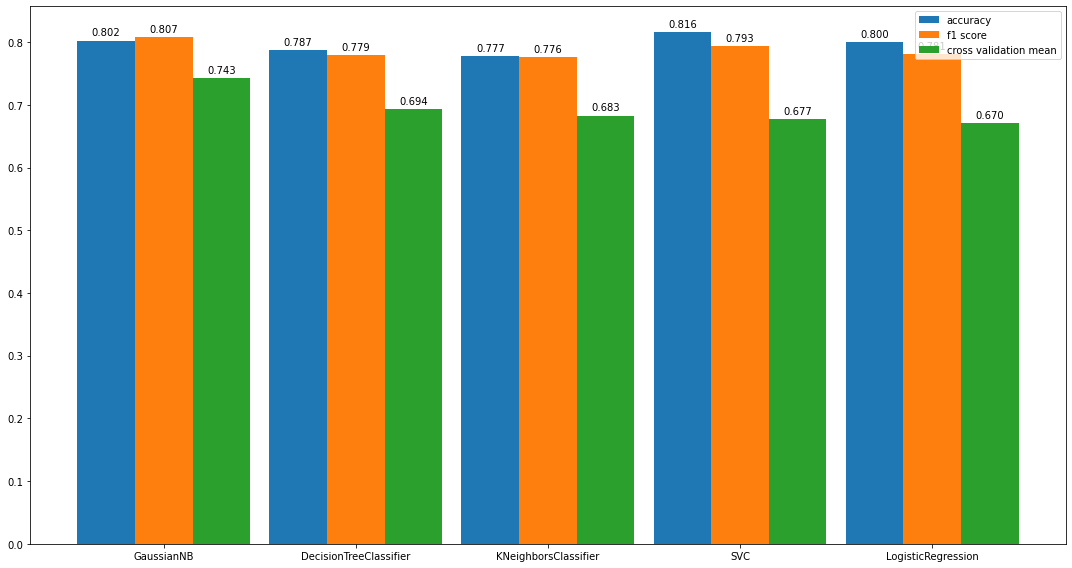

In [10]:
from sklearn.metrics import f1_score, accuracy_score

random_state = 42

base_models = {
    "GaussianNB": GaussianNB(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, random_state=random_state),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=3, weights="distance"),
    "SVC": SVC(C=10, random_state=42, kernel = "poly",),
    "LogisticRegression": LogisticRegression(C= 10, random_state=random_state,penalty = "none")
}

for (name, model) in base_models.items():
    model.fit(X_train, y_train)
        
default_f1_scores = plot_models(base_models)
print()


### Question 3

In [287]:
from sklearn.model_selection import GridSearchCV

SVC_params = { 
    'C': [70, 80, 90],
    'kernel': ['rbf', 'poly', 'sigmoid']
}
DecisionTreeClassifier_params = {
    'max_depth': range(6, 12),
    'min_samples_leaf': range(10, 25)
}

LogisticRegression_params = { 
    'C': [1,2,3,5,7,50,60,80,100,120,140],
    'penalty': ['none', 'l2'],
}

KNeighboursClassifier_params = {
    'n_neighbors': [21,22,24,24,25],
    'weights': ['uniform', 'distance']
}

grid_search_svc = GridSearchCV(estimator=SVC(), param_grid=SVC_params)
grid_result = grid_search_svc.fit(X_train_split, y_train_split)
best_params_svc = grid_result.best_params_
best_score_svc = grid_result.best_score_
print("Best parameters for SVC: ")
print(best_params_svc)
print(best_score_svc)
print()

grid_search_decision_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=DecisionTreeClassifier_params)
grid_result = grid_search_decision_tree.fit(X_train_split, y_train_split)
best_params_dtc = grid_result.best_params_
best_score_dtc = grid_result.best_score_
print("Best parameters for DecisionTreeClassifier:")
print(best_params_dtc)
print(best_score_dtc)
print()

grid_search_logistic_regression = GridSearchCV(estimator=LogisticRegression(), 
                                               param_grid=LogisticRegression_params)
grid_result = grid_search_logistic_regression.fit(X_train_split, y_train_split)
best_params_lr = grid_result.best_params_
best_score_lr = grid_result.best_score_
print("Best parameters for Logistic regression:")
print(best_params_lr)
print(best_score_lr)
print()

grid_search_k_neighbour = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=KNeighboursClassifier_params)
grid_result = grid_search_k_neighbour.fit(X_train_split, y_train_split)
best_params_kn = grid_result.best_params_
best_score_kn = grid_result.best_score_
print("Best parameters for KNeighborsClassifier:")
print(best_params_kn)
print(best_score_kn)

Best parameters for SVC: 
{'C': 90, 'kernel': 'poly'}
0.8135992739687407

Best parameters for DecisionTreeClassifier:
{'max_depth': 9, 'min_samples_leaf': 23}
0.8285375404580702

Best parameters for Logistic regression:
{'C': 80, 'penalty': 'l2'}
0.7971154827899338

Best parameters for KNeighborsClassifier:
{'n_neighbors': 21, 'weights': 'uniform'}
0.7926999571823552


### Question 4

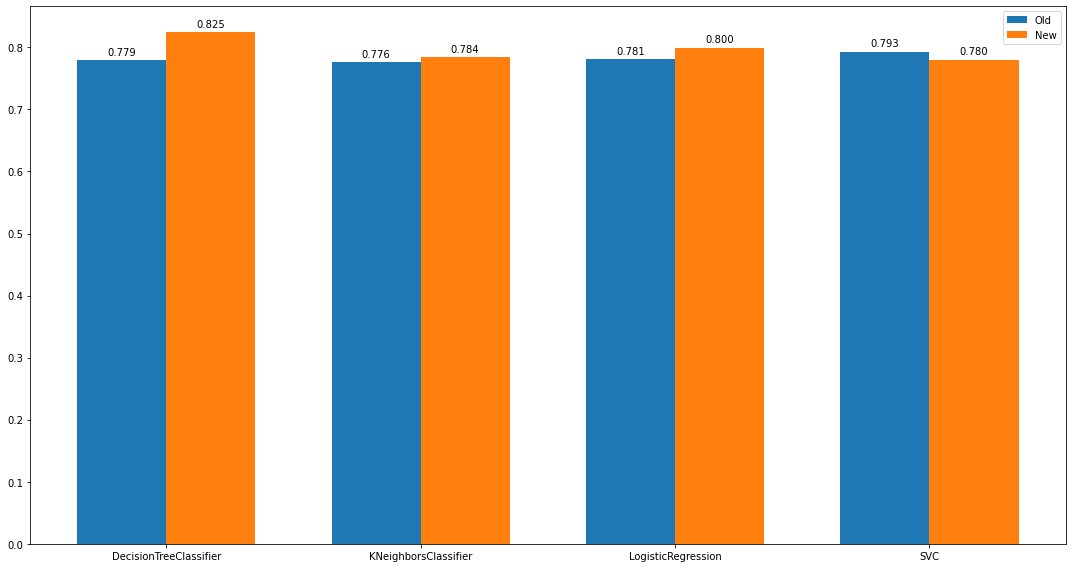

In [11]:
new_models = {
    "DecisionTreeClassifier" : DecisionTreeClassifier(max_depth=9, min_samples_leaf=23, random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=24, weights="uniform"),
    "SVC" : SVC(C=90, kernel="poly", random_state=42),
    "LogisticRegression": LogisticRegression(C=80, penalty = "l2", random_state=42)
}
for (name, model) in new_models.items():
    model.fit(X_train, y_train)

compare_models_f1({"DecisionTreeClassifier":base_models["DecisionTreeClassifier"],"KNeighborsClassifier":base_models["KNeighborsClassifier"],"LogisticRegression":base_models["LogisticRegression"],"SVC":base_models["SVC"]}, new_models)

### Question 5

In [12]:
classifier = DecisionTreeClassifier(max_depth=9, min_samples_leaf=23, random_state=42)
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_census.txt", index=False, header=False)